# Analyse Dataset du Titanic, 
**pratique de Pandas**

**BUT** : Prédire si un passager va survivre 

## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
data = pd.read_excel('dataset_titanic.xls')

## Les données

1309 lignes (m, exemples) & 14 colonnes (n, variables)

In [31]:
data.shape

(1309, 14)

In [30]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Pre-processing

### Feature Selection

Nous allos éliminer les variables (colonnes) qui ne nous osn pas utile pour notre but de prédire la survie ou non d'un passagé.

In [32]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [34]:
data_selec_col = data.drop(['name', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis= 1)

In [37]:
data_selec_col.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Avec la fct `.describe()` on peut observer:

- `count`: Il manque des valeurs dans la colonne `age`
- `mean`:  38% des passagers ont survecues 
- `min`: la personne la plus jeune avait 16 mois
- `max`: la personne la plus agé avait 80 ans

### Gestion des données manquantes

La colonne `age` présente des données manquantes.  
Nous pouvons remplir par une valeur comme la moyenne des valeurs de la colonne par exemple mais nous allons altérer le dataset ...   
ou supprimer la ligne complète et perdre des données

#### Remplir une donnée manquante `.fillna()`  
Par la moyenne des autres valeurs de la variable

In [39]:
data_fillna_age = data_selec_col.fillna(data_selec_col['age'].mean())

In [41]:
data_fillna_age.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,12.883199
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,29.881135
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


#### supprimer les lignes avec des données manquantes

In [42]:
data_dropna = data_selec_col.dropna(axis=0) 

In [44]:
data_dropna.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [45]:
data_dropna.shape

(1046, 4)

Nous sommes passé de 1309 à 1046 exemples ...

### Value counts

In [48]:
data_dropna['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

On observe le nombre de passager par classe 1, 2 ou 3 

### Graphiques

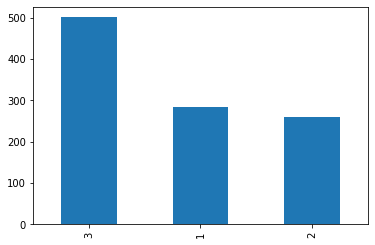

In [56]:
data_dropna["pclass"].value_counts().plot.bar()

